# Braking down the data to make the data 

In [90]:
# imports 

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np



from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [30]:
# read in xls file 

df = pd.read_excel('../data/analytical_take_home_data_v2.xlsx')
print(df.shape)
df.head()

(15474, 4)


,treatment,company_size,campaign_spend,campaign_budget
0,False,small,10.4477,3.9035
1,False,medium,3.7776,1.9872
2,False,medium,46.1880,55.4523
3,False,small,6.6271,6.5136
4,False,small,92.3405,83.1018


## Feature Engineering

In [31]:
# Create column 'percent_of_budget' 
#      =  (campaign_spend / campaign_budget) * 100

df['percent_of_budget'] = (df['campaign_spend'] / df['campaign_budget'])
df.head(2)

,treatment,company_size,campaign_spend,campaign_budget,percent_of_budget
0,False,small,10.4477,3.9035,2.676495
1,False,medium,3.7776,1.9872,1.900966


In [32]:
# Ordinal Encoding

df['company_size'] = df['company_size'].map({'small':1,'medium':2,'large':3})
df['treatment'] = df['treatment'].map({False:0,True:1})

In [33]:
df.head()

,treatment,company_size,campaign_spend,campaign_budget,percent_of_budget
0,0,1,10.4477,3.9035,2.676495
1,0,2,3.7776,1.9872,1.900966
2,0,2,46.1880,55.4523,0.832932
3,0,1,6.6271,6.5136,1.017425
4,0,1,92.3405,83.1018,1.111173


## Exploring at 'campaign budget'

In [83]:
df['campaign_budget'].skew()

76.20526926142672

In [100]:
X = df[['campaign_budget']]

In [101]:
type(X)

pandas.core.frame.DataFrame

In [115]:
new = pd.DataFrame()
type(new)

pandas.core.frame.DataFrame

In [114]:
a = Normalizer().fit(X)
new['a'] = a.transform(X)

Exception: Data must be 1-dimensional

In [104]:
ss = StandardScaler()
b = ss.fit(X)

In [116]:
b = b.transform(X)

In [120]:
b.plot().hist

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [ ]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)

# Exploring Campaign Budget

In [158]:
df['campaign_budget'].skew()

76.20526926142672

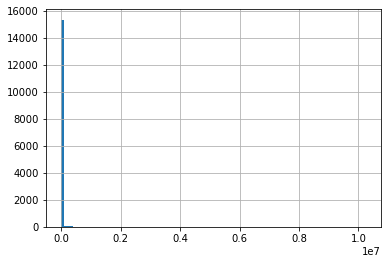

In [159]:
df['campaign_budget'].hist(bins = 100);

There is no distribution visible because of the outliers, therefore we will remove the outliers that are past the upper inner fence. 

### Idenifying Outliers 

In [126]:
## outliers for campaign budget

Q1 = df['campaign_budget'].quantile(.25)
Q3 = df['campaign_budget'].quantile(.75)
IQR = Q3 - Q1

In [144]:
# Number of outliers past upper inner fence 

df[ (df['campaign_budget'] > (Q3 + 1.5 * IQR) )].count()

treatment            2680
company_size         2680
campaign_spend       2680
campaign_budget      2680
percent_of_budget    2680
dtype: int64

In [175]:
# Number of outliers past upper outer fence 

df[ (df['campaign_budget'] > (Q3 + (3 * IQR)) )].count()

treatment            2273
company_size         2273
campaign_spend       2273
campaign_budget      2273
percent_of_budget    2273
dtype: int64

Above is the outlers that are past upper outer fence 

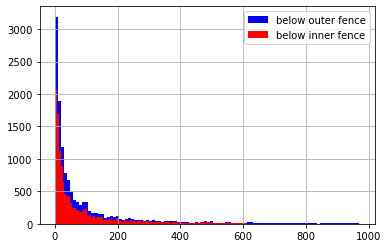

In [174]:
# distrobution of Campaign budget BELLOW upper outer fence



df[ (df['campaign_budget'] <= (Q3 + 3 * IQR) )]['campaign_budget'].hist(bins = 100,
                                                                        color = 'blue',
                                                                       label = 'below outer fence');
df[ (df['campaign_budget'] <= (Q3 + 1.5 * IQR) )]['campaign_budget'].hist(bins = 100,
                                                                          color = 'red',
                                                                         label = 'below inner fence');
plt.legend();

We can see the difference between the distributions of the upper and inner fence, we create the dividing line between at the innner fence.  Splitting up the distribution into one of all outliers above the upper outer fence and everything else. 

In [186]:
# dataframe of all points under upper inner fence
under_UpperInnerFence =  df[ (df['campaign_budget'] <= (Q3 + 1.5 * IQR) )]

# dataframe of all points above upper inner fence
above_UpperInnerFence =  df[ (df['campaign_budget'] > (Q3 + 1.5 * IQR) )]

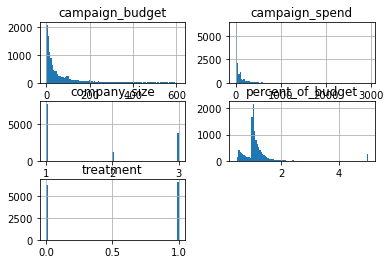

In [187]:
# graph of all points below upper inner fence

under_UpperInnerFence.hist(bins = 100);

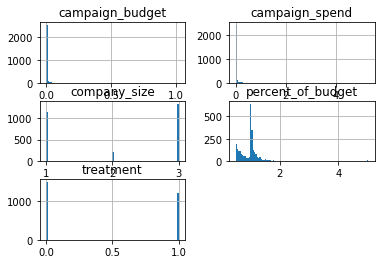

In [184]:
# graph of all points above upper inner fence

above_UpperInnerFence.hist(bins = 100);

We have created under_UpperInnerFence and above_UpperInnerFence, 

   Next step i will divide the data up by the two curves on the percent of budget distobution.

## Exploration of 'percent of budget'

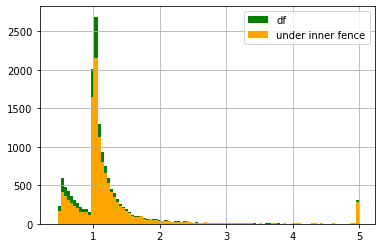

In [196]:
# compare df & df w/o outliers

df['percent_of_budget'].hist(bins = 100, 
                             color = 'green',
                            label = 'df')
under_UpperInnerFence['percent_of_budget'].hist(bins = 100,
                                               color = 'orange',
                                               label = 'under inner fence');
plt.legend();

#### Outliers

In [197]:
# outliers for 'percent_of_budget'

Q1_p = df['percent_of_budget'].quantile(.25)
Q3_p = df['percent_of_budget'].quantile(.75)
IQR_p = Q3_p - Q1_p

In [208]:
# Number of outliers past upper inner fence 

df[ (df['percent_of_budget'] > (Q3_p + 1.5 * IQR_p) )]['treatment'].count()

1705

In [213]:
under_UpperInnerFence[ (under_UpperInnerFence['percent_of_budget'] > (Q3_p + 1.5 * IQR_p) )]['treatment'].count()

1516

In [215]:
 1705 - 1516
    

189

There are only a 189 less outliers past the UPPER INNER FENCE in 'under_UpperInnerFence' then in df, making there still 1,516 outliers in 'percent_of_budget'.

In [207]:
# Number of outliers past upper outer fence 

df[ (df['percent_of_budget'] > (Q3_p + 3 * IQR_p) )]['treatment'].count()

1079

In [216]:
# Number of outliers past upper outer fence 

under_UpperInnerFence[ (under_UpperInnerFence['percent_of_budget'] > (Q3_p + 3 * IQR_p) )]['treatment'].count()

966

In [217]:
1079 - 966

113

There are only a 113 less outliers past the UPPER INNER FENCE in 'under_UpperInnerFence' then in df, making there still 1,516 outliers in 'percent_of_budget'.

    This makes me infer that the percent_of_budget used does not relate to over all 'campaign_budget'

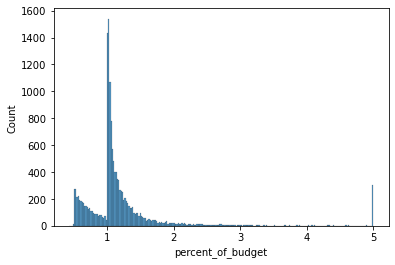

In [156]:
sns.histplot( data = df, x = 'percent_of_budget');

In [78]:
# identify outliers 

df.quantile()


treatment             0.000000
company_size          1.000000
campaign_spend       15.178125
campaign_budget      12.792900
percent_of_budget     1.003081
Name: 0.25, dtype: float64

In [75]:
# divide the Curves

SM_distrubution = df[ df['percent_of_budget'] < 1 ]
LG_distrubution = df[ df['percent_of_budget'] >= 1 ]


# number of rows in origonal 
print(df['treatment'].count())
# confirm no rows are missing
print(SM_distrubution.count() + LG_distrubution.count())

15474
treatment            15474
company_size         15474
campaign_spend       15474
campaign_budget      15474
percent_of_budget    15474
dtype: int64


## Disrobutions for small curves

In [ ]:
## check for outliers 



In [76]:
(df['treatment'] == 0)
(df['treatment'] == 1);

In [77]:
(df['company_size'] == 1)
(df['company_size'] == 2)
(df['company_size'] == 3);

In [36]:
# t_small
t_small = df[(df['treatment'] == 0) & (df['company_size'] == 1)]

In [56]:
# t_large
t_large = df[(df['treatment'] == 0) & (df['company_size'] == 3)]

In [58]:
# t_medium 
t_medium = df[(df['treatment'] == 0) & (df['company_size'] == 2)]


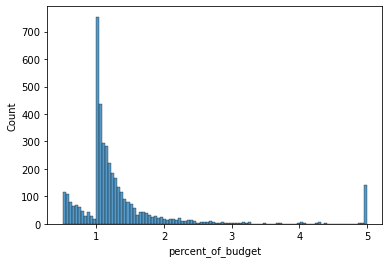

In [65]:

sns.histplot( data = t_small, x = 'percent_of_budget')

<bound method Axes.hist of <matplotlib.axes._subplots.AxesSubplot object at 0x7fd4d5c47610>>

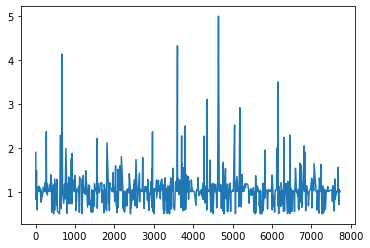

In [59]:
t_medium['percent_of_budget'].plot().hist